In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 캘리포니아 주택 가격 데이터

 Linear Regression (선형 회귀)

 Ridge Regression (릿지 회귀, L2 norm)

 Lasso Regression (라쏘 회귀, L1 norm)

 Elastic-Net (신축망)

 Orthogonal Matchin Pursuit (직교 정합 추구)

 Polynormial Regression (다항 회귀)

---

 Logistic Regression

In [ ]:
# EDA & visualization

from sklearn.datasets import fetch_california_housing

# 캘리포니아 주택 가격 데이터는 외장 데이터라 설치를 해야합니다.
california = fetch_california_housing()

print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
ex

In [ ]:
import pandas as pd

california_df = pd.DataFrame(california.data, columns = california.feature_names)
print(california_df.head())
print()

california_df['Target'] = california.target
print(california_df.head())

california_df.describe()

   MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0  8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1  8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2  7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3  5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4  3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25

[5 rows x 8 columns]

   MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude  Target
0  8.3252      41.0  6.984127   1.023810  ...  2.555556     37.88    -122.23   4.526
1  8.3014      21.0  6.238137   0.971880  ...  2.109842     37.86    -122.22   3.585
2  7.2574      52.0  8.288136   1.073446  ...  2.802260     37.85    -122.24   3.521
3  5.6431      52.0  5.817352   1.073059  ...  2.547945     37.85    -122.25   3.413
4  3.8462      52.0  6.281853   1.081081  ...  2.181467     37.85    -122.25   3.422

[5 rows x 9 columns]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


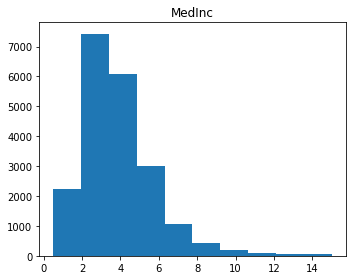

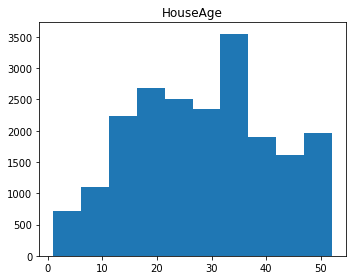

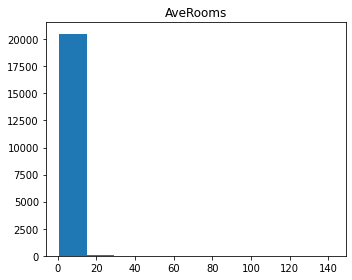

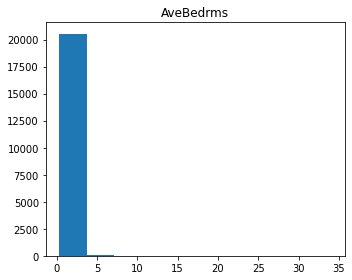

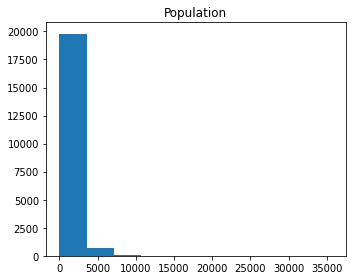

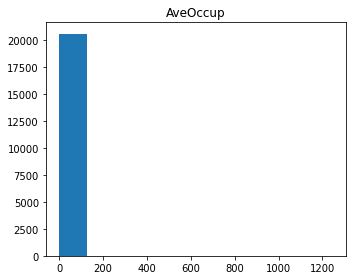

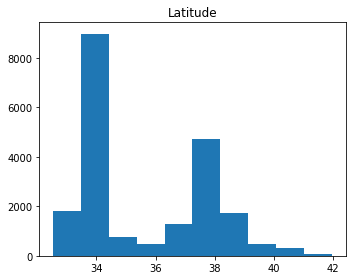

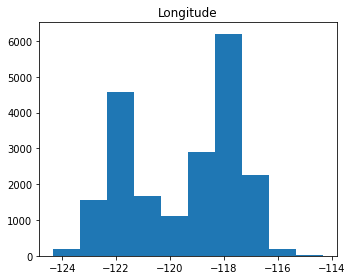

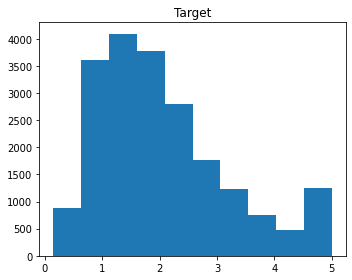

In [ ]:
import matplotlib.pyplot as plt

# fig, axes = plt.subplots(4,2, figsize = (8,16))

for i, col in enumerate(california_df.columns):
  plt.figure(figsize = (5,4))
  plt.hist(california_df[col])
  plt.title(col)
  plt.tight_layout()

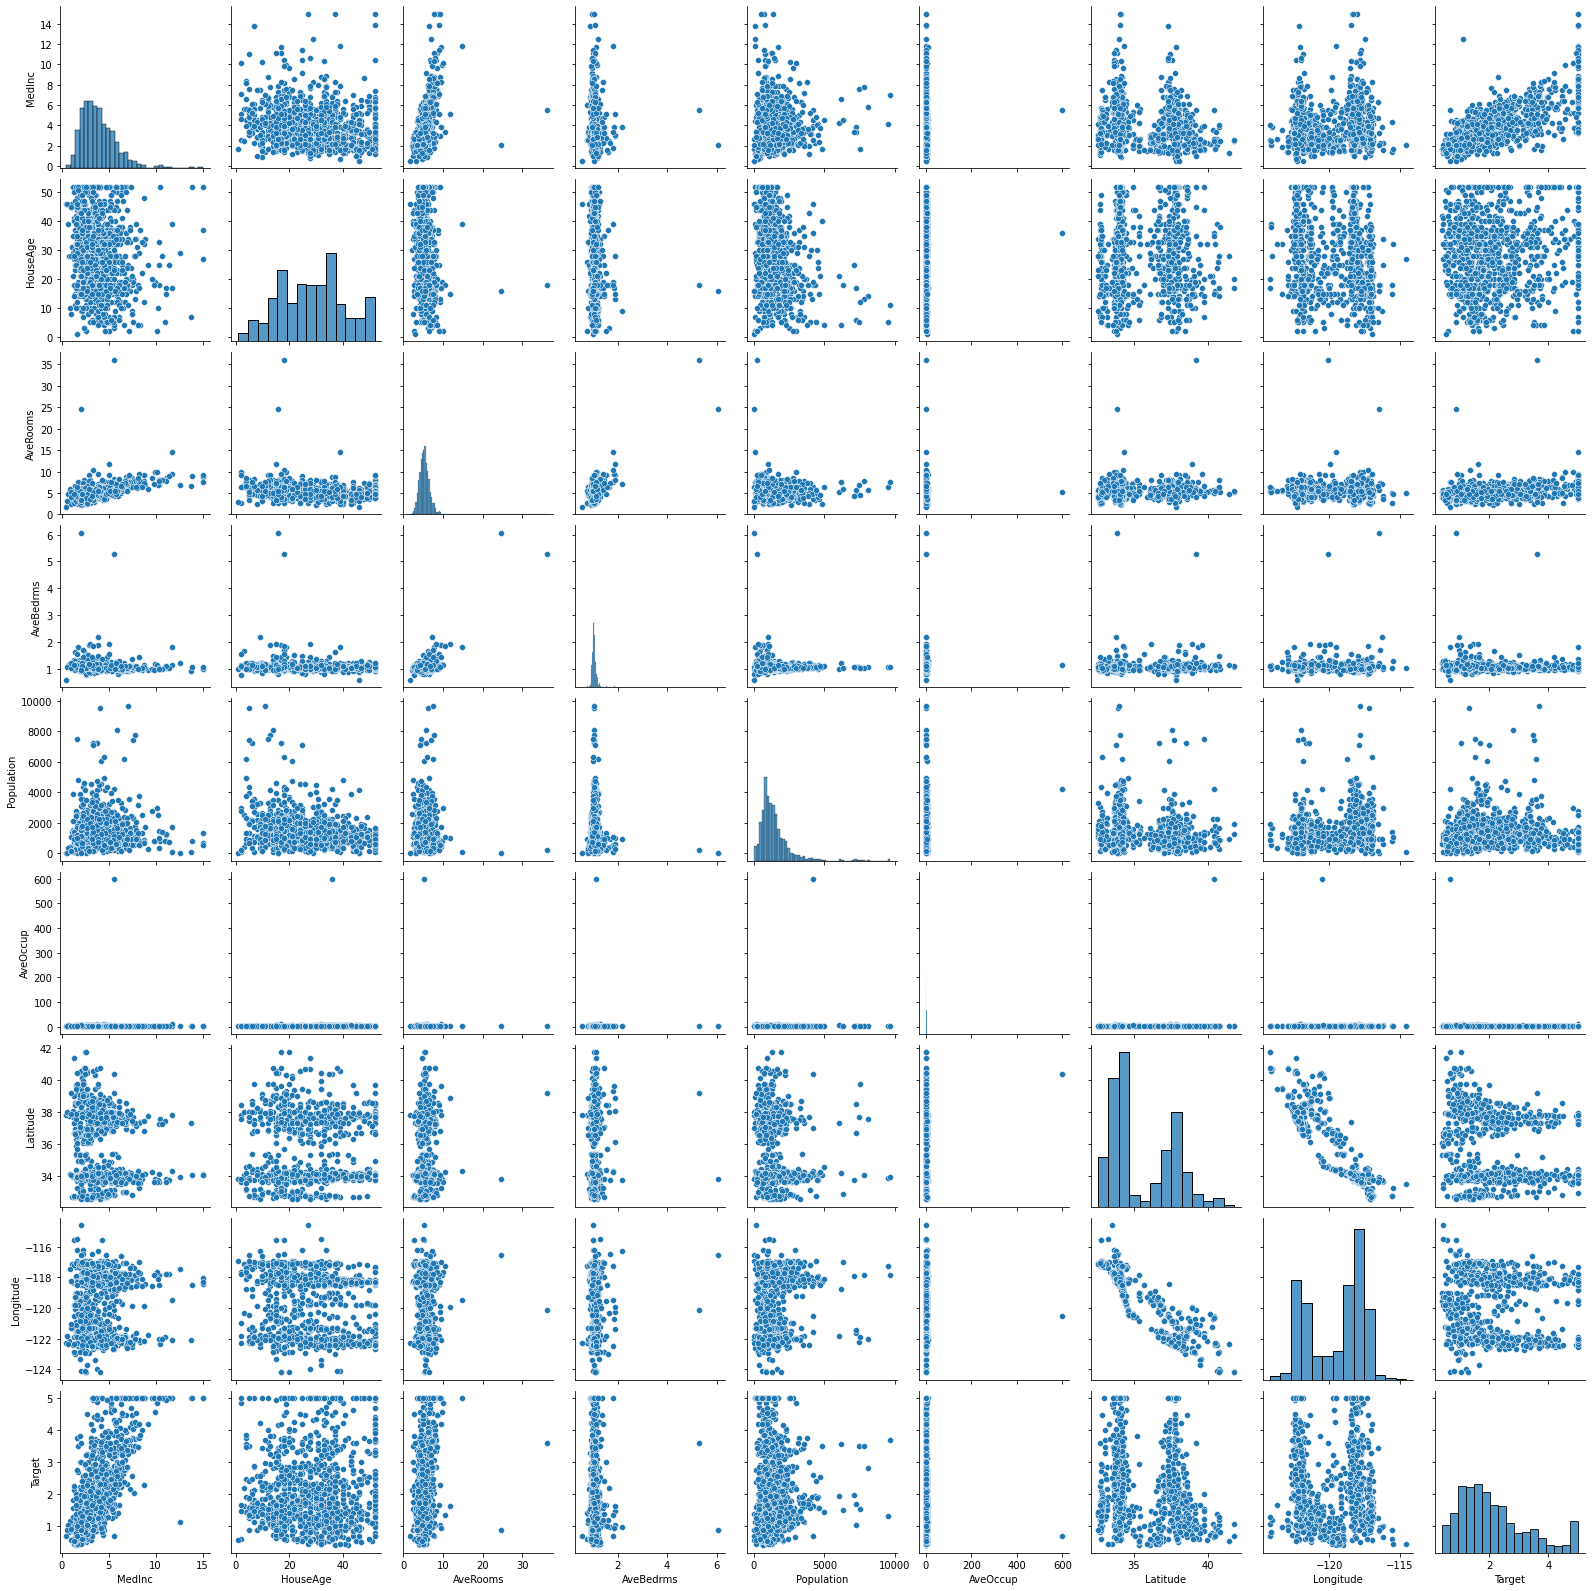

In [ ]:
import seaborn as sns

sns.pairplot(california_df.sample(1000))

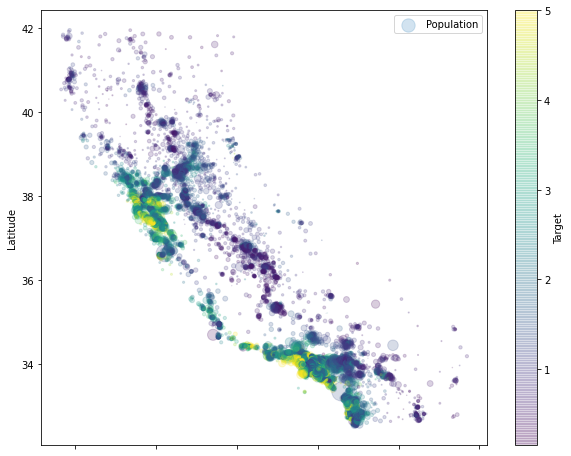

In [ ]:
# 위도와 경도를 이용해 지도 이미지 처럼 시각화
california_df.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude', alpha=0.2,
                   s = california_df['Population']/100, label = 'Population', figsize = (10,8),
                   c = 'Target', cmap = plt.get_cmap('viridis'), colorbar = True)

# 밝은 색일 수록 Target 값이 높음 (가격이 비쌈)

# Linear Regression

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2)

model.fit(X_train, y_train)

print("Train scores : {:.3f}".format(model.score(X_train, y_train)))
print("Test scores : {:.3f}".format(model.score(X_test, y_test)))
print()


# 평가
# non-cross val
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("RMSE : {:.3f}".format(rmse))
print("R2 Score : {:.3f}".format(r2))
print()


# cross validation
scores = cross_val_score(model, california.data, california.target, cv=10, scoring = 'neg_mean_squared_error')
mse = (-1) * np.mean(scores)
print("RMSE : {:.3f}".format(np.sqrt(mse)))

r2_scores = cross_val_score(model, california.data, california.target, cv=10, scoring = 'r2')
print("R2 Score mean : {:.3f}".format(r2_scores.mean()))


Train scores : 0.610
Test scores : 0.592

RMSE : 0.722
R2 Score : 0.610

RMSE : 0.742
R2 Score mean : 0.511


In [ ]:
# coef_ : 추정된 가중치 벡터(들)
# intercept_ : 추정된 상수항(편향)

print('y = ' + str(round(model.intercept_, 4)) + ' ')
for i, c in enumerate(model.coef_):
  print('\t + ' + str(round(c, 4)) + ' * x' + str(i))

y = -37.3901 
	 + 0.4326 * x0
	 + 0.0091 * x1
	 + -0.103 * x2
	 + 0.6145 * x3
	 + -0.0 * x4
	 + -0.0046 * x5
	 + -0.4285 * x6
	 + -0.4407 * x7


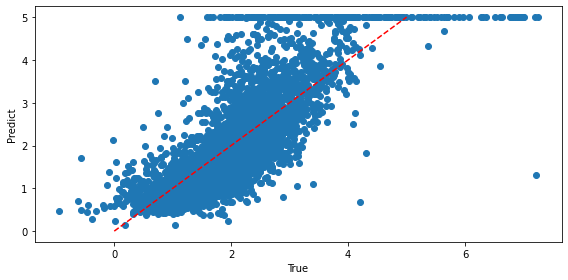

In [ ]:
def plot_california_prices(expected, predicted):
  plt.figure(figsize = (8,4))
  plt.scatter(expected, predicted)
  plt.plot([0, 5], [0, 5], '--r')
  plt.xlabel('True')
  plt.ylabel('Predict')
  plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_california_prices(predicted, expected)

# Ridge Regression (릿지 회귀)

*   Linear Regression을 개선한 모델

*   Linear Regression보다 '가중치의 절대 값을' 최소화하는 것을 목적
*   특성(feature)이 출력 값에 주는 영향을 최소화 하도록 규제(regularization), 제약을 부여함.
*   규제를 사용하면 다중공선성(multiconllinearity) 문제를 예방해 오버피팅을 방지함. (Test data에 높은 성능을 보일 수 있음)
*   다중공선성 문제는 두 특성의 상관관계가 아주 높을 경우 발생.

RidgeMSE = MSE + alpha * (w_0 + ... + w_n)

alpha 값이 커질 수록 규제의 효과가 커지고, 작을 수록 효과가 작아짐


In [ ]:
from sklearn.linear_model import Ridge

X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = Ridge(alpha = 0.1)    # alpha 값을 조절

model.fit(X_train, y_train)

print("Train score : {:.3f}".format(model.score(X_train, y_train)))
print("Test score : {:.3f}".format(model.score(X_test, y_test)))


Train score : 0.604
Test score : 0.614


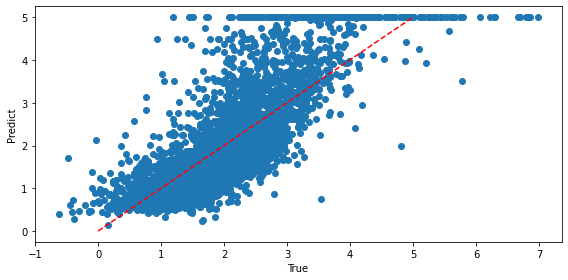

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(predicted, expected)

# Lasso Regression (라쏘 회귀)

*   Ridge Regression과 마찬가지로 규제를 적용.
*   가중치를 0에 가깝게 만드려고 노력

LassoMSE = MSE + alpha * | w_0 + ... + w_n |

In [ ]:
from sklearn.linear_model import Lasso

X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = Lasso(alpha = 0.1)
model.fit(X_train, y_train)

print("Train score : {:.3f}".format(model.score(X_train, y_train)))
print("Test score : {:.3f}".format(model.score(X_test, y_test)))


Train score : 0.548
Test score : 0.530


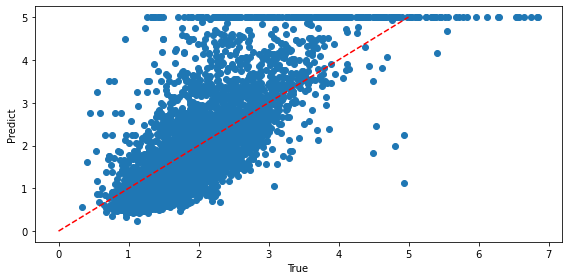

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(predicted, expected)

# Elastic-Net (신축망)

*   Ridge Regression과 Lasso Regression의 규제 모두 사용하는 모델
*   feature가 많거나 features 간 상관관계가 높은 특성이 존재할 때 성능이 좋음.

ElasticMSE = MSE + alpha * p * | w_0 + ... + w_n | + alpha * (1-p) * (w_0 + ... + w_n)

alpha : 규제의 강도

p : Ridge와 Lasso의 규제의 비율

In [ ]:
from sklearn.linear_model import ElasticNet

X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = ElasticNet(alpha = 0.1)

model.fit(X_train, y_train)

print("Train score : {:.3f}".format(model.score(X_train,y_train)))
print("Test score : {:.3f}".format(model.score(X_test,y_test)))


Train score : 0.575
Test score : 0.577


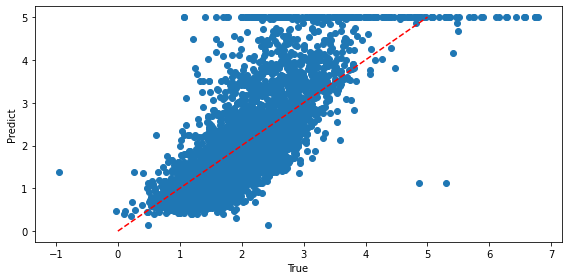

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(predicted, expected)

# Orthogonal Matching Pursuit (직교 정합 추구)

*   모델에 존재하는 '가중치 벡터'에 제약을 거는 기법

*   features 수 만큼의 0이 아닌 가중치(w)들이 k개 이하로 되도록 학습

In [ ]:
from sklearn.linear_model import OrthogonalMatchingPursuit

X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = OrthogonalMatchingPursuit(n_nonzero_coefs = 4)
model.fit(X_train, y_train)

print("Train score : {:.3f}".format(model.score(X_train, y_train)))
print("Test score : {:.3f}".format(model.score(X_test, y_test)))

Train score : 0.594
Test score : 0.595


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


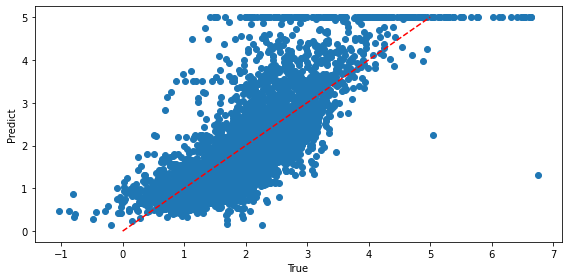

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(predicted, expected)

# Polynomial Regression (다항 회귀)

*   입력 데이터를 비선형 변환 후 사용
*   모델 자체는 선형 모델

y_hat = Linear + w_1 * (feature_1)^2 + w_2 * (feature_2)^2

고차원의 데이터를 회귀하는데 유용함.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = make_pipeline(
    PolynomialFeatures(degree = 2),     # features 들을 2차원 까지 늘려서 추가
    StandardScaler(),                   # 표준화를 거침
    LinearRegression()                  # 모델은 Linear Regression을 사용함.
)


model.fit(X_train, y_train)

print("Train score : {:.3f}".format(model.score(X_train, y_train)))
print("Test score : {:.3f}".format(model.score(X_test, y_test)))


Train score : 0.682
Test score : 0.671


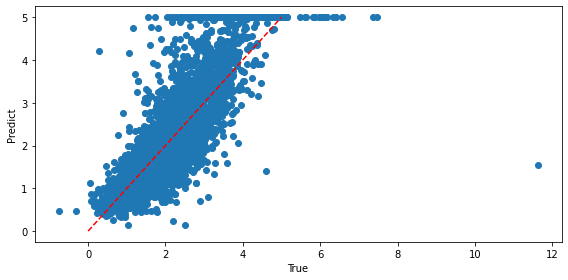

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(predicted, expected)